In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/01 Rock n Roll/08 Offkick 182BPM
  01 2th Snare.mid
  02 8th Snare.mid
  03 8th Snare.mid
  04 8th Hat Closed.mid
  05 8th Hat Closed.mid
  06 8th Hat Both.mid
  07 16th Hat Closed.mid
  08 8th Hat Closed.mid
  09 8th Hat Both.mid
  10 8th Ride.mid
  11 8th Ride.mid
  12 16th Ride.mid
  13 16th Ride.mid
  14 8th Toms.mid
  15 16th Perc Side.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/01 Rock n Roll/09 Rumblin 192BPM Triplets
  01 8th Ride.mid
  02 8th Ride.mid
  03 8th Ride.mid
  04 8th Ride.mid
  05 8th Ride Toms.mid
  06 8th Hat Closed.mid
  07 8th Hat Closed.mid
  08 8th Hat Open.mid
  09 Hat Open.mid
  10 8th Hat Both.mid
  11 8th Snare Perc.mid
  12 8th Toms Hat.mid
  13 8th Ride Multi.mid
  14 8th Ride Multi.mid
  15 8th Perc Multi.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/01 Rock n Roll/10 Uptime 112BPM
  01 16th Snare Perc.mid
  02 16th Snare Perc.mid
  03 8th Hat Closed Per


Encoding midi-data
 1000
> -> multi-track = True none
 [INFO] : 
 |  True


In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [8]:
genres[0][-2:]

["01 Rock'n'Roll", '01 Dancin Rick 166BPM']

In [9]:
dn = config.dataset_dir + 'drum_midi/' + '50´s Drummer MIDI Files'
# for a in os.walk(config.dataset_dir + 'drum_midi'):
#     print(a)
sorted(os.listdir(dn))

['.DS_Store',
 "01 Rock'n'Roll",
 '02 Blues',
 '03 Traditional Pop',
 '04 Country',
 '05 Jazz',
 '06 Soul - Funk',
 '07 Indie']

In [10]:
unique_genres = set(genre[-2] +'/'+ genre[-1] for genre in genres)
len(unique_genres)

110

In [11]:
unique_genres

{'01 Rock n Roll/01 Shuffle 186BPM',
 '01 Rock n Roll/02 Straight 150BPM',
 '01 Rock n Roll/03 Chucky 140BPM',
 '01 Rock n Roll/04 Deddley 150BPM',
 '01 Rock n Roll/05 Diamond 164BPM',
 '01 Rock n Roll/06 Swingin 132BPM Triplets',
 '01 Rock n Roll/07 Domino 167BPM',
 '01 Rock n Roll/08 Offkick 182BPM',
 '01 Rock n Roll/09 Rumblin 192BPM Triplets',
 '01 Rock n Roll/10 Uptime 112BPM',
 "01 Rock'n'Roll/01 Dancin Rick 166BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM",
 "01 Rock'n'Roll/03 Lips n Hips 152BPM",
 "01 Rock'n'Roll/04 Maybelline 233BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/07 Thwag 170BPM",
 "01 Rock'n'Roll/08 Doowoop 140bpm",
 "01 Rock'n'Roll/09 Diddeley 185bpm",
 "01 Rock'n'Roll/10 Ottis 172bpm",
 '02 Blues Rock/01 Clutch 90BPM Triplets',
 '02 Blues Rock/02 Sixeight 58BPM',
 '02 Blues Rock/03 Fire 148BPM',
 '02 Blues Rock/04 Whiteroom 112BPM',
 '02 Blues Rock/05 Bluesshuffle 116BPM',
 '02 Blues Rock/06 Straight 130BPM',
 '02

In [12]:
x_train.shape

(1000, 160, 10, 1)

In [13]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [14]:
x_test = x_train[m:]
x_train = x_train[:m]

In [15]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [16]:
# i = 0
# j = 399
# plot.single(x_train[i, :50,:,0])
# plot.single(x_train[j, :50,:,0])
# # plot.single(x_train[2a, :50,:,0])
# np.array(labels)[[i,j]]

In [17]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [20]:
latent_dim = 10
epsilon_std = 1.0

In [29]:
decoder_input = Input(shape=(latent_dim,) )


In [95]:
utils.reload(models)
vae, encoder, generator = models.build(input_shape, latent_dim, epsilon_std)

/usr/local/lib/python3.6/site-packages/keras/layers/core.py:642: UserWarning: `output_shape` argument not specified for layer lambda_30 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `[(None, 10), (None, 10)]` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/Users/mark/src/pattern-recognition/src/models.py:147: UserWarning: Output "decoder_model-" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder_model-" during training.
  vae.compile(optimizer='adam')


In [71]:
# vae.to_json()

In [19]:
# vae, encoder, generator = models.build(input_shape, latent_dim)

In [77]:
batch_size = 128
epochs = 500
params = {'batch_size': batch_size, 'return_y': False}

In [21]:
# phase_mod = 0.01
# whitening = False

In [78]:
m = 10
useDataGenerator = False
# useDataGenerator = True
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

x = x_train[:m]
# x = x_train
# i = [0,1, 7,8, 14,15, 399,400]
# x = x_train[i]
# x = np.concatenate([x for _ in range(10)])
print('x:', x.shape)

print('batch_size: %i' % batch_size)
print('update-iterations:', round(epochs * x.shape[0] / batch_size))
if useDataGenerator:
    datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
    history = collections.defaultdict(list)
    n_batches = datagen.__len__()
    for e in range(epochs):
        print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
        for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
            print(' Batch %i/%i' % (batch_i,n_batches))
            x_ = x_batch
            # x_ = datagen.shuffle_3rd_dim(x_)
            # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
            h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
            for k,v in h.history.items(): 
                print(' \\_%s' % k, [round(v_,) for v_ in v])
                history[k].append(v)
            if batch_i >= n_batches:
                break
else:
    h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
    history = h.history

/usr/local/lib/python3.6/site-packages/keras/callbacks.py:694: UserWarning: You are not using the TensorFlow backend. write_graph was set to False
  warnings.warn('You are not using the TensorFlow backend. '


x: (10, 160, 10, 1)
batch_size: 128
update-iterations: 39
Train on 10 samples, validate on 100 samples
Epoch 1/500
10/10 [==============================] - 1s 107ms/step - loss: 1153.3599 - val_loss: 1134.0798
Epoch 2/500
10/10 [==============================] - 1s 115ms/step - loss: 1116.7712 - val_loss: 1116.5872
Epoch 3/500
10/10 [==============================] - 1s 114ms/step - loss: 1075.6838 - val_loss: 1097.8144
Epoch 4/500
10/10 [==============================] - 1s 106ms/step - loss: 1049.5232 - val_loss: 1075.8114
Epoch 5/500
10/10 [==============================] - 1s 105ms/step - loss: 1011.0426 - val_loss: 1050.9563
Epoch 6/500
10/10 [==============================] - 1s 104ms/step - loss: 961.7267 - val_loss: 1019.2490
Epoch 7/500
10/10 [==============================] - 1s 105ms/step - loss: 911.0750 - val_loss: 981.7701
Epoch 8/500
10/10 [==============================] - 1s 104ms/step - loss: 884.9443 - val_loss: 939.8612
Epoch 9/500
10/10 [===========================

Epoch 78/500
10/10 [==============================] - 1s 102ms/step - loss: 113.3407 - val_loss: 84.1816
Epoch 79/500
10/10 [==============================] - 1s 102ms/step - loss: 112.3320 - val_loss: 84.1539
Epoch 80/500
10/10 [==============================] - 1s 125ms/step - loss: 111.3490 - val_loss: 84.1721
Epoch 81/500
10/10 [==============================] - 1s 109ms/step - loss: 113.8703 - val_loss: 83.9411
Epoch 82/500
10/10 [==============================] - 1s 105ms/step - loss: 112.4471 - val_loss: 83.9517
Epoch 83/500
10/10 [==============================] - 1s 104ms/step - loss: 113.8538 - val_loss: 83.5131
Epoch 84/500
10/10 [==============================] - 1s 103ms/step - loss: 112.0678 - val_loss: 83.7091
Epoch 85/500
10/10 [==============================] - 1s 106ms/step - loss: 111.8420 - val_loss: 83.4618
Epoch 86/500
10/10 [==============================] - 1s 105ms/step - loss: 112.3516 - val_loss: 83.6654
Epoch 87/500
10/10 [==============================] - 1

Epoch 156/500
10/10 [==============================] - 1s 103ms/step - loss: 109.4966 - val_loss: 84.1383
Epoch 157/500
10/10 [==============================] - 1s 103ms/step - loss: 109.3131 - val_loss: 84.3943
Epoch 158/500
10/10 [==============================] - 1s 103ms/step - loss: 108.7931 - val_loss: 84.4368
Epoch 159/500
10/10 [==============================] - 1s 102ms/step - loss: 108.6742 - val_loss: 84.8673
Epoch 160/500
10/10 [==============================] - 1s 102ms/step - loss: 109.1221 - val_loss: 84.9822
Epoch 161/500
10/10 [==============================] - 1s 102ms/step - loss: 109.9897 - val_loss: 84.9839
Epoch 162/500
10/10 [==============================] - 1s 104ms/step - loss: 109.0916 - val_loss: 85.1128
Epoch 163/500
10/10 [==============================] - 1s 103ms/step - loss: 108.7527 - val_loss: 85.1990
Epoch 164/500
10/10 [==============================] - 1s 104ms/step - loss: 108.1963 - val_loss: 85.0290
Epoch 165/500
10/10 [=========================

Epoch 234/500
10/10 [==============================] - 1s 126ms/step - loss: 108.1040 - val_loss: 85.1205
Epoch 235/500
10/10 [==============================] - 1s 123ms/step - loss: 105.6737 - val_loss: 85.2207
Epoch 236/500
10/10 [==============================] - 1s 116ms/step - loss: 106.2745 - val_loss: 85.4306
Epoch 237/500
10/10 [==============================] - 1s 102ms/step - loss: 104.8982 - val_loss: 85.1024
Epoch 238/500
10/10 [==============================] - 1s 119ms/step - loss: 105.5307 - val_loss: 85.7034
Epoch 239/500
10/10 [==============================] - 1s 111ms/step - loss: 105.6080 - val_loss: 85.3975
Epoch 240/500
10/10 [==============================] - 1s 107ms/step - loss: 106.9905 - val_loss: 85.5999
Epoch 241/500
10/10 [==============================] - 1s 127ms/step - loss: 105.7589 - val_loss: 85.7380
Epoch 242/500
10/10 [==============================] - 1s 107ms/step - loss: 107.1556 - val_loss: 85.2259
Epoch 243/500
10/10 [=========================

Epoch 312/500
10/10 [==============================] - 1s 106ms/step - loss: 102.8670 - val_loss: 85.8844
Epoch 313/500
10/10 [==============================] - 1s 125ms/step - loss: 104.0498 - val_loss: 85.7532
Epoch 314/500
10/10 [==============================] - 1s 110ms/step - loss: 101.9917 - val_loss: 85.6621
Epoch 315/500
10/10 [==============================] - 1s 128ms/step - loss: 104.2366 - val_loss: 85.7631
Epoch 316/500
10/10 [==============================] - 1s 124ms/step - loss: 101.7554 - val_loss: 86.1341
Epoch 317/500
10/10 [==============================] - 1s 125ms/step - loss: 103.1697 - val_loss: 86.5081
Epoch 318/500
10/10 [==============================] - 1s 109ms/step - loss: 102.6241 - val_loss: 86.8804
Epoch 319/500
10/10 [==============================] - 1s 133ms/step - loss: 102.8885 - val_loss: 87.4614
Epoch 320/500
10/10 [==============================] - 1s 124ms/step - loss: 103.0456 - val_loss: 87.6232
Epoch 321/500
10/10 [=========================

Epoch 390/500
10/10 [==============================] - 1s 115ms/step - loss: 93.6708 - val_loss: 91.6290
Epoch 391/500
10/10 [==============================] - 1s 113ms/step - loss: 93.1553 - val_loss: 90.2108
Epoch 392/500
10/10 [==============================] - 1s 124ms/step - loss: 95.0113 - val_loss: 87.8299
Epoch 393/500
10/10 [==============================] - 1s 133ms/step - loss: 92.3213 - val_loss: 87.8301
Epoch 394/500
10/10 [==============================] - 1s 139ms/step - loss: 94.9325 - val_loss: 88.7519
Epoch 395/500
10/10 [==============================] - 1s 112ms/step - loss: 91.9746 - val_loss: 88.2449
Epoch 396/500
10/10 [==============================] - 1s 127ms/step - loss: 92.6160 - val_loss: 88.5715
Epoch 397/500
10/10 [==============================] - 2s 170ms/step - loss: 98.6009 - val_loss: 87.3764
Epoch 398/500
10/10 [==============================] - 1s 126ms/step - loss: 94.6151 - val_loss: 87.2677
Epoch 399/500
10/10 [==============================] - 

10/10 [==============================] - 1s 119ms/step - loss: 85.1924 - val_loss: 89.2619
Epoch 469/500
10/10 [==============================] - 2s 156ms/step - loss: 84.3790 - val_loss: 89.4360
Epoch 470/500
10/10 [==============================] - 1s 134ms/step - loss: 84.5433 - val_loss: 89.9116
Epoch 471/500
10/10 [==============================] - 1s 143ms/step - loss: 84.7007 - val_loss: 89.6629
Epoch 472/500
10/10 [==============================] - 1s 112ms/step - loss: 84.9173 - val_loss: 89.3160
Epoch 473/500
10/10 [==============================] - 1s 113ms/step - loss: 84.1434 - val_loss: 89.7585
Epoch 474/500
10/10 [==============================] - 1s 106ms/step - loss: 84.3170 - val_loss: 90.3762
Epoch 475/500
10/10 [==============================] - 1s 112ms/step - loss: 84.0979 - val_loss: 90.0332
Epoch 476/500
10/10 [==============================] - 1s 106ms/step - loss: 84.1034 - val_loss: 89.7563
Epoch 477/500
10/10 [==============================] - 1s 110ms/step 

In [73]:
# fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'
name = 'non-functional_model.h5'
fn = config.model_dir + name

In [74]:
# io.save_dict('../logs/','train_loss-' + name, history)

In [75]:
# vae.save_weights(fn, "w")

In [94]:
# vae.load_weights(fn)

In [79]:
vae.save(fn + '__save')

In [34]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


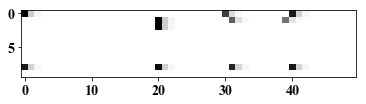

m (50, 10, 1)


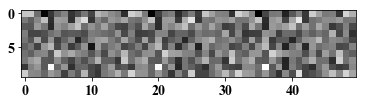

m (50, 10, 1)


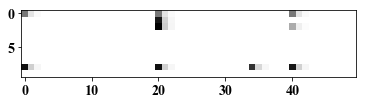

m (50, 10, 1)


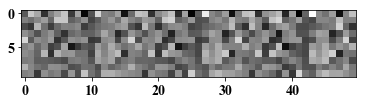

In [96]:
i,j = 240, 30
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

m (40, 10, 1)


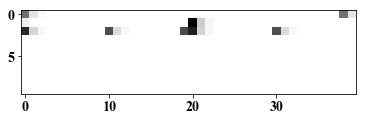

m (40, 10, 1)


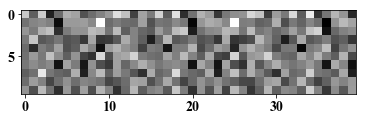

In [98]:
x_ = generator.predict(encoder.predict(x_train[:10]))
plot.single(x_train[0,:40])
plot.single(x_[0,:40])

m (50, 10, 1)


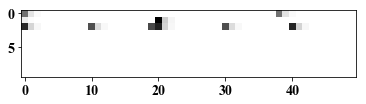

m (50, 10, 1)


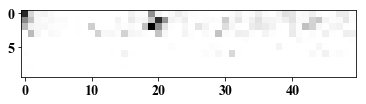

m (50, 10, 1)


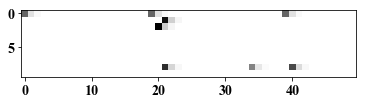

m (50, 10, 1)


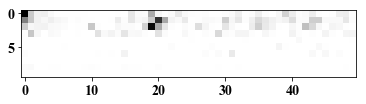

In [81]:
i,j = 0, 10

m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [29]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [30]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [31]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [32]:
# # build a model to project inputs on the latent space
# encoder = Model(encoder_input, z_mean)

In [33]:
# generator_input = Input((latent_dim,))
# generator_layers_ = utils.composition(decoders, generator_input)
# generator = Model(generator_input, generator_layers_)

In [34]:
decoder = generator

## Style transfer

In [35]:
import sklearn.feature_selection
import sklearn.ensemble

In [36]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [37]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [38]:
# a = list({3:[2],'s':[3,3]}.keys())
# np.random.shuffle(a)
# a

In [39]:
import transformation_extraction

In [40]:
d = {'a':3, 'b':2}
dd = np.array(list(d.keys()))

In [41]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt1=1000, amt2=1, v=1)


 Genre A: 07 Indie/05 Halftime 71BPM
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 7, importance: 0.248984

 Genre A: 04 Country/08 Eddie Ed 111BPM
  genre B: 	04 Country/09 Broonze 122BPM (len: 7)
 	 i: 3, importance: 0.245765

 Genre A: 01 Rock n Roll/07 Domino 167BPM
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 9, importance: 0.278106

 Genre A: 05 Jazz/04 Silent Tear 234BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 6, importance: 0.236138

 Genre A: 03 Traditional Pop/09 Distel 155BPM
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 6, importance: 0.231831

 Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.244365

 Genre A: 02 Blues/08 Sams 127BPM
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 8, importance: 0.170232

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	05 Jazz/06 Nucleus 172BPM Brushes (len: 7)
 	 i: 7, importance: 0.32

  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 9, importance: 0.304303

 Genre A: 01 Rock n Roll/08 Offkick 182BPM
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 0, importance: 0.198925

 Genre A: 02 Blues Rock/06 Straight 130BPM
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 4, importance: 0.181314

 Genre A: 07 Indie/07 Rock Keeler 133BPM
  genre B: 	07 Indie/06 Swing Funk 102BPM (len: 7)
 	 i: 7, importance: 0.166500

 Genre A: 07 Indie/13 Mid Groover 111BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 4, importance: 0.149353

 Genre A: 05 Jazz/01 Amel 85BPM Brushes
  genre B: 	05 Jazz/04 Silent Tear 234BPM (len: 7)
 	 i: 8, importance: 0.317056

 Genre A: 06 Soul - Funk/10 Syncopated Ride 128BPM
  genre B: 	04 Country/01 Calvin 148BPM (len: 7)
 	 i: 8, importance: 0.290816

 Genre A: 03 Traditional Pop/01 Fly High 115BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 9, importance: 0.244595

 Genre A: 03 Traditional Pop/02 

  genre B: 	06 Soul - Funk/03 Cadence Soul 105BPM (len: 7)
 	 i: 4, importance: 0.255669

 Genre A: 05 Jazz/02 Another You 170BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 7, importance: 0.218670

 Genre A: 02 Blues/04 Mickeys 212BPM 12-8
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 2, importance: 0.164148

 Genre A: 03 Jazz/01 Swing 150BPM Triplets
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 9, importance: 0.300242

 Genre A: 05 Jazz/08 Neodop 226BPM 3-4
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 4, importance: 0.209171

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 4, importance: 0.161184

 Genre A: 07 Indie/17 Relaxed 88BPM
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 6, importance: 0.164214

 Genre A: 04 Country/09 Broonze 122BPM
  genre B: 	07 Indie/07 Rock Keeler 133BPM (len: 7)
 	 i: 9, importance: 0.288968

 Genre A: 07 Ind

  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 9, importance: 0.306196

 Genre A: 07 Indie/19 Distant Floor 119BPM
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 9, importance: 0.198874

 Genre A: 04 Country/07 Trainy 100BPM
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 7, importance: 0.237283

 Genre A: 03 Jazz/03 Gipsy 218BPM Triplets
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 7, importance: 0.282942

 Genre A: 02 Blues Rock/05 Bluesshuffle 116BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 4, importance: 0.286137

 Genre A: 06 Soul - Funk/02 Boogaloo 120BPM
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 9, importance: 0.430557

 Genre A: 01 Rock n Roll/05 Diamond 164BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 0, importance: 0.235441

 Genre A: 07 Indie/02 Rock Tribal 125BPM
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 4, importance: 0.258075

 Genre A: 07 Indie/15 Tribal 

  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 8, importance: 0.297466

 Genre A: 03 Traditional Pop/02 Frankies Girl 116BPM
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 8, importance: 0.198730

 Genre A: 02 Blues Rock/01 Clutch 90BPM Triplets
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 4, importance: 0.251934

 Genre A: 01 Rock'n'Roll/03 Lips n Hips 152BPM
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 6, importance: 0.353196

 Genre A: 06 Soul - Funk/01 Soul Groove 107BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 7, importance: 0.250712

 Genre A: 01 Rock'n'Roll/04 Maybelline 233BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 8, importance: 0.244620

 Genre A: 01 Rock n Roll/05 Diamond 164BPM
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 5, importance: 0.219478

 Genre A: 06 Soul - Funk/04 GoGo Soul 100BPM
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 9, importance: 0.2725

  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 9, importance: 0.301846

 Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	01 Rock n Roll/01 Shuffle 186BPM (len: 15)
 	 i: 3, importance: 0.196082

 Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 4, importance: 0.327507

 Genre A: 06 Soul - Funk/08 Rim Soul 90BPM
  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 7, importance: 0.292712

 Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 4, importance: 0.344876

 Genre A: 01 Rock n Roll/06 Swingin 132BPM Triplets
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 7, importance: 0.331803

 Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 6, importance: 0.262829

 Genre A: 03 Traditional Pop/04 Love 155BPM
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.315871

 Genre A: 07 Indie/01 Ro

  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 8, importance: 0.193854

 Genre A: 03 Traditional Pop/07 Lester Lee 133BPM
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 9, importance: 0.221769

 Genre A: 06 Soul - Funk/08 Rim Soul 90BPM
  genre B: 	06 Soul - Funk/04 GoGo Soul 100BPM (len: 7)
 	 i: 9, importance: 0.365781

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 7, importance: 0.251016

 Genre A: 02 Blues/04 Mickeys 212BPM 12-8
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 1, importance: 0.195686

 Genre A: 05 Jazz/01 Amel 85BPM Brushes
  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 1, importance: 0.238172

 Genre A: 01 Rock'n'Roll/08 Doowoop 140bpm
  genre B: 	03 Traditional Pop/09 Distel 155BPM (len: 7)
 	 i: 1, importance: 0.217613

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 0, importance: 0.232724

 Genre A: 07 Indie/15 Tri

  genre B: 	06 Soul - Funk/02 Boogaloo 120BPM (len: 7)
 	 i: 3, importance: 0.241016

 Genre A: 05 Jazz/03 Cool 137BPM Brushes
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 1, importance: 0.242410

 Genre A: 05 Jazz/09 West Coast 152BPM Brushes
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 7, importance: 0.237423

 Genre A: 05 Jazz/02 Another You 170BPM
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 9, importance: 0.235168

 Genre A: 07 Indie/08 Bouncer 162BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 5, importance: 0.230692

 Genre A: 01 Rock'n'Roll/01 Dancin Rick 166BPM
  genre B: 	04 Country/06 Booker 170BPM (len: 7)
 	 i: 9, importance: 0.286630

 Genre A: 04 Country/04 Snarey 208BPM 3-4
  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 7, importance: 0.225002

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	02 Blues/01 Booze 92BPM (len: 7)
 	 i: 4, importance: 0.277509

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 

  genre B: 	01 Rock'n'Roll/03 Lips n Hips 152BPM (len: 7)
 	 i: 2, importance: 0.199540

 Genre A: 07 Indie/10 Chilled 120BPM
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 7, importance: 0.277645

 Genre A: 07 Indie/09 Slow Shuffle 80BPM
  genre B: 	06 Soul - Funk/07 Ride Swing 95Bpm (len: 7)
 	 i: 9, importance: 0.198117

 Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 9, importance: 0.256721

 Genre A: 06 Soul - Funk/10 Syncopated Ride 128BPM
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 9, importance: 0.318629

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 6, importance: 0.373240

 Genre A: 01 Rock'n'Roll/04 Maybelline 233BPM
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 0, importance: 0.175559

 Genre A: 07 Indie/17 Relaxed 88BPM
  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 8, importance: 0.175229

 Genre A: 01 Rock n Roll/07 Domi

  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 0, importance: 0.267056

 Genre A: 01 Rock n Roll/09 Rumblin 192BPM Triplets
  genre B: 	07 Indie/04 Titanic 97BPM (len: 7)
 	 i: 7, importance: 0.292508

 Genre A: 06 Soul - Funk/05 Hip Hop 95BPM
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 7, importance: 0.248978

 Genre A: 02 Blues Rock/02 Sixeight 58BPM
  genre B: 	06 Soul - Funk/07 Ride Swing 95Bpm (len: 7)
 	 i: 8, importance: 0.274743

 Genre A: 03 Traditional Pop/08 Cecil Cee 101BPM
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 1, importance: 0.200698

 Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	02 Blues/05 Cadillac 128BPM (len: 7)
 	 i: 9, importance: 0.318987

 Genre A: 07 Indie/17 Relaxed 88BPM
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 5, importance: 0.244398

 Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 4, importance: 0.228160

 Genre A

  genre B: 	07 Indie/07 Rock Keeler 133BPM (len: 7)
 	 i: 7, importance: 0.163939

 Genre A: 02 Blues/08 Sams 127BPM
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 6, importance: 0.184327

 Genre A: 07 Indie/16 Medium Flow 120BPM
  genre B: 	07 Indie/18 Disco Weirdo 146BPM (len: 7)
 	 i: 4, importance: 0.159930

 Genre A: 07 Indie/16 Medium Flow 120BPM
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 1, importance: 0.208725

 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 2, importance: 0.281140

 Genre A: 02 Blues/06 Vidar Vega 70BPM
  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 9, importance: 0.201048

 Genre A: 04 Country/09 Broonze 122BPM
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 2, importance: 0.220029

 Genre A: 07 Indie/10 Chilled 120BPM
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 6, importance: 0.305057

 Genre A: 01 Rock n Roll/10 Uptime 112BPM
  genre B: 	02 Blues

  genre B: 	04 Country/03 Straight 72BPM Brushes (len: 7)
 	 i: 2, importance: 0.228923

 Genre A: 01 Rock n Roll/09 Rumblin 192BPM Triplets
  genre B: 	04 Country/01 Calvin 148BPM (len: 7)
 	 i: 7, importance: 0.240972

 Genre A: 05 Jazz/08 Neodop 226BPM 3-4
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 2, importance: 0.196000

 Genre A: 06 Soul - Funk/01 Soul Groove 107BPM
  genre B: 	01 Rock'n'Roll/03 Lips n Hips 152BPM (len: 7)
 	 i: 2, importance: 0.289468

 Genre A: 07 Indie/01 Rock Shuffle 130BPM
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 9, importance: 0.204581

 Genre A: 02 Blues/07 Straight 88BPM
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 7, importance: 0.366469

 Genre A: 04 Country/07 Trainy 100BPM
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 7, importance: 0.185258

 Genre A: 02 Blues/07 Straight 88BPM
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 9, importance: 0.175196

 Genre A: 06 Soul - 

  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 7, importance: 0.291926

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 7, importance: 0.325216

 Genre A: 02 Blues/07 Straight 88BPM
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 7, importance: 0.403141

 Genre A: 04 Country/03 Straight 72BPM Brushes
  genre B: 	05 Jazz/06 Nucleus 172BPM Brushes (len: 7)
 	 i: 8, importance: 0.243215

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	04 Country/05 Brewer 160BPM (len: 7)
 	 i: 9, importance: 0.280213

 Genre A: 02 Blues/08 Sams 127BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 8, importance: 0.160968

 Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 2, importance: 0.169624

 Genre A: 07 Indie/18 Disco Weirdo 146BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 8, importance: 0.166650

 Genre A: 06 Soul - Funk/08 Rim So

  genre B: 	03 Traditional Pop/02 Frankies Girl 116BPM (len: 7)
 	 i: 9, importance: 0.251098

 Genre A: 06 Soul - Funk/05 Hip Hop 95BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 3, importance: 0.298725

 Genre A: 02 Blues Rock/06 Straight 130BPM
  genre B: 	07 Indie/03 Moon 137BPM (len: 7)
 	 i: 6, importance: 0.136400

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	02 Blues/01 Booze 92BPM (len: 7)
 	 i: 7, importance: 0.200851

 Genre A: 06 Soul - Funk/07 Ride Swing 95Bpm
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 9, importance: 0.183078

 Genre A: 01 Rock'n'Roll/07 Thwag 170BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 3, importance: 0.185299

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 	07 Indie/17 Relaxed 88BPM (len: 7)
 	 i: 8, importance: 0.187377

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 9, importance: 0.183855

 Genre A: 06 Soul - Funk/

  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 9, importance: 0.313677

 Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 8, importance: 0.269366

 Genre A: 03 Traditional Pop/06 Bopop 130MPM
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 5, importance: 0.240719

 Genre A: 03 Traditional Pop/04 Love 155BPM
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 9, importance: 0.290876

 Genre A: 03 Traditional Pop/05 Your Eyes 80BPM
  genre B: 	06 Soul - Funk/02 Boogaloo 120BPM (len: 7)
 	 i: 3, importance: 0.330511

 Genre A: 01 Rock'n'Roll/01 Dancin Rick 166BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 4, importance: 0.294172

 Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 7, importance: 0.293119

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 7, importance: 0.211439

 Genre A: 01 Roc

  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 6, importance: 0.235417

 Genre A: 07 Indie/11 Disco Dancer 135BPM
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 4, importance: 0.212888

 Genre A: 03 Jazz/01 Swing 150BPM Triplets
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 9, importance: 0.458147

 Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 5, importance: 0.248682

 Genre A: 07 Indie/11 Disco Dancer 135BPM
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 9, importance: 0.187387

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	01 Rock'n'Roll/03 Lips n Hips 152BPM (len: 7)
 	 i: 2, importance: 0.208935

 Genre A: 04 Country/03 Straight 72BPM Brushes
  genre B: 	05 Jazz/01 Amel 85BPM Brushes (len: 7)
 	 i: 7, importance: 0.253564

 Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 9, importance: 0.283139

 Genre A: 01 Rock n Roll

In [42]:
print('avg importance: %f' % np.mean(importances))

avg importance: 0.246087


In [43]:
# list(min_transformations.items())[0]

In [44]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  


Genre `07 Indie/05 Halftime 71BPM` to: 
 dim:	genre:
 0 	05 Jazz/02 Another You 170BPM

Genre `04 Country/08 Eddie Ed 111BPM` to: 
 dim:	genre:
 0 	02 Blues/05 Cadillac 128BPM

Genre `01 Rock n Roll/07 Domino 167BPM` to: 
 dim:	genre:
 0 	06 Soul - Funk/10 Syncopated Ride 128BPM

Genre `05 Jazz/04 Silent Tear 234BPM` to: 
 dim:	genre:
 5 	04 Country/10 Rough Rider 183BPM

Genre `03 Traditional Pop/09 Distel 155BPM` to: 
 dim:	genre:
 4 	06 Soul - Funk/03 Cadence Soul 105BPM

Genre `04 Country/01 Calvin 148BPM` to: 
 dim:	genre:
 0 	02 Blues/07 Straight 88BPM

Genre `02 Blues/08 Sams 127BPM` to: 
 dim:	genre:
 0 	03 Traditional Pop/05 Your Eyes 80BPM

Genre `01 Rock n Roll/03 Chucky 140BPM` to: 
 dim:	genre:
 8 	02 Blues/08 Sams 127BPM

Genre `04 Country/04 Snarey 208BPM 3-4` to: 
 dim:	genre:
 2 	06 Soul - Funk/10 Syncopated Ride 128BPM

Genre `06 Soul - Funk/01 Soul Groove 107BPM` to: 
 dim:	genre:
 2 	02 Blues/01 Booze 92BPM

Genre `02 Blues/07 Straight 88BPM` to: 
 dim:	genre:
 9 	

(array([ 86.,  46.,  86.,  42.,  97.,  54.,  93., 161., 101., 229.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

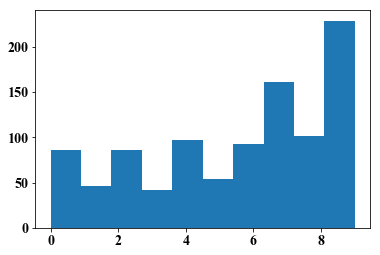

In [45]:
plt.hist(best_dims)

In [46]:
# TODO save as python object (or json)

In [47]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

fn = config.plots_dir + 'transformations-best_dims.pkl'
io.save(best_dims, fn)

fn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)

'../results/min_transformations.pkl'

In [48]:
t_ = io.load(fn)

In [49]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [50]:
list(transformations.keys())[:3]

['07 Indie/05 Halftime 71BPM',
 '04 Country/08 Eddie Ed 111BPM',
 '01 Rock n Roll/07 Domino 167BPM']

In [51]:
len(transformations.keys())

103